<a href="https://colab.research.google.com/github/DrBart20/EksploracjaDanych/blob/main/Zaj9/Naive_Bayes_zadania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


# Zadanie 1:  

## Email Spam

 Masz dane o 12 emailach z informacją czy to spam czy nie:

 **Zadania do wykonania:**

**a) Ręczne obliczenia**
1. Oblicz prawdopodobieństwa a priori: P(Spam=TAK) i P(Spam=NIE)
2. Dla każdej cechy oblicz prawdopodobieństwa warunkowe
3. Przewidź klasę dla nowego emaila:
```
   Słowo_1 = 'darmowy'
   Słowo_2 = 'wygrana'  
   Wykrzyknik = 'TAK'
```

Oblicz prawdopodobieństwa dla obu klas (TAK lub NIE) i znormalizuj

**b) Implementacja w Python**

1. Zaimplementuj obliczenia z punktu a) w Python (bez sklearn)
2. Porównaj wyniki z ręcznymi obliczeniami

**c) Sklearn**

1. Użyj `CategoricalNB` z sklearn do wytrenowania modelu
2. Porównaj wyniki z własnymi obliczeniami
3. Wyjaśnij różnice (jeśli są)

In [16]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}

df = pd.DataFrame(data_spam)

total = len(df)
num_spam_tak = len(df[df['Spam'] == 'TAK'])
num_spam_nie = len(df[df['Spam'] == 'NIE'])

print("Liczba emaili Spam=TAK:", num_spam_tak)
print("Liczba emaili Spam=NIE:", num_spam_nie)

p_spam_tak = num_spam_tak / total
p_spam_nie = num_spam_nie / total

print("P(Spam=TAK):", p_spam_tak)
print("P(Spam=NIE):", p_spam_nie)

def conditional_probability(df, feature, value, spam_class):
    subset = df[df['Spam'] == spam_class]
    return len(subset[subset[feature] == value]) / len(subset)

# Spam = TAK
p_s1_tak = conditional_probability(df, 'Słowo_1', 'darmowy', 'TAK')
p_s2_tak = conditional_probability(df, 'Słowo_2', 'wygrana', 'TAK')
p_w_tak  = conditional_probability(df, 'Wykrzyknik', 'TAK', 'TAK')

# Spam = NIE
p_s1_nie = conditional_probability(df, 'Słowo_1', 'darmowy', 'NIE')
p_s2_nie = conditional_probability(df, 'Słowo_2', 'wygrana', 'NIE')
p_w_nie  = conditional_probability(df, 'Wykrzyknik', 'TAK', 'NIE')

print("\nPrawdopodobieństwa warunkowe:")
print("P(darmowy | TAK):", p_s1_tak)
print("P(wygrana | TAK):", p_s2_tak)
print("P(Wykrzyknik=TAK | TAK):", p_w_tak)

print("P(darmowy | NIE):", p_s1_nie)
print("P(wygrana | NIE):", p_s2_nie)
print("P(Wykrzyknik=TAK | NIE):", p_w_nie)

score_tak = p_spam_tak * p_s1_tak * p_s2_tak * p_w_tak
score_nie = p_spam_nie * p_s1_nie * p_s2_nie * p_w_nie

print("\nWyniki nienormalizowane:")
print("Spam=TAK:", score_tak)
print("Spam=NIE:", score_nie)

total_score = score_tak + score_nie

p_tak_norm = score_tak / total_score if total_score > 0 else 0
p_nie_norm = score_nie / total_score if total_score > 0 else 0

print("\nPrawdopodobieństwa po normalizacji:")
print("P(Spam=TAK | dane):", p_tak_norm)
print("P(Spam=NIE | dane):", p_nie_norm)

new_mail = {
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
}

def classify_email(df, email):
    total = len(df)
    classes = df['Spam'].unique()
    scores = {}

    for cls in classes:
        subset = df[df['Spam'] == cls]
        prior = len(subset) / total

        score = prior

        for feature, value in email.items():
            count = len(subset[subset[feature] == value])
            prob = count / len(subset) if len(subset) > 0 else 0
            score *= prob

        scores[cls] = score

    total_score = sum(scores.values())
    probs = {k: (v / total_score if total_score > 0 else 0)
             for k, v in scores.items()}

    prediction = max(probs, key=probs.get)

    return prediction, probs

prediction, probabilities = classify_email(df, new_mail)

print("\nKlasa:", prediction)
print("Prawdopodobieństwa:", probabilities)

Liczba emaili Spam=TAK: 4
Liczba emaili Spam=NIE: 8
P(Spam=TAK): 0.3333333333333333
P(Spam=NIE): 0.6666666666666666

Prawdopodobieństwa warunkowe:
P(darmowy | TAK): 1.0
P(wygrana | TAK): 0.5
P(Wykrzyknik=TAK | TAK): 1.0
P(darmowy | NIE): 0.0
P(wygrana | NIE): 0.0
P(Wykrzyknik=TAK | NIE): 0.375

Wyniki nienormalizowane:
Spam=TAK: 0.16666666666666666
Spam=NIE: 0.0

Prawdopodobieństwa po normalizacji:
P(Spam=TAK | dane): 1.0
P(Spam=NIE | dane): 0.0

Klasa: TAK
Prawdopodobieństwa: {'TAK': 1.0, 'NIE': 0.0}


In [20]:
#CategoricalNB
df = pd.DataFrame(data_spam)

X = df[['Słowo_1', 'Słowo_2', 'Wykrzyknik']]
y = df['Spam']

encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = CategoricalNB()
model.fit(X_encoded, y)

email = pd.DataFrame([{
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
}])

email_encoded = encoder.transform(email)

prediction = model.predict(email_encoded)
proba = model.predict_proba(email_encoded)

print("Predykcja sklearn:", prediction[0])
print("Prawdopodobieństwa sklearn:", proba) #NIE / TAK


Predykcja sklearn: TAK
Prawdopodobieństwa sklearn: [[0.0321193 0.9678807]]


# Zadanie 2

## Diagnoza grypy

Lekarz diagnozuje grypę na podstawie objawów u 15 pacjentów:

a) Analiza danych

1. Ile przypadków grypy jest w danych?
2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))
3. Stwórz wizualizację rozkładów cech dla każdej klasy

b) Predykcja dla 3 pacjentów
Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
* Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
* Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
* Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane

Liczba przypadków grypy:
Grypa
TAK    8
NIE    7
Name: count, dtype: int64

Prawdopodobieństwa warunkowe P(cecha|Grypa):

Gorączka:
  wysoka: P(TAK)=0.75, P(NIE)=0.14
  niska: P(TAK)=0.00, P(NIE)=0.71
  umiarkowana: P(TAK)=0.25, P(NIE)=0.14

Kaszel:
  TAK: P(TAK)=1.00, P(NIE)=0.14
  NIE: P(TAK)=0.00, P(NIE)=0.86

Zmęczenie:
  duże: P(TAK)=0.88, P(NIE)=0.00
  małe: P(TAK)=0.00, P(NIE)=0.86
  umiarkowane: P(TAK)=0.12, P(NIE)=0.14


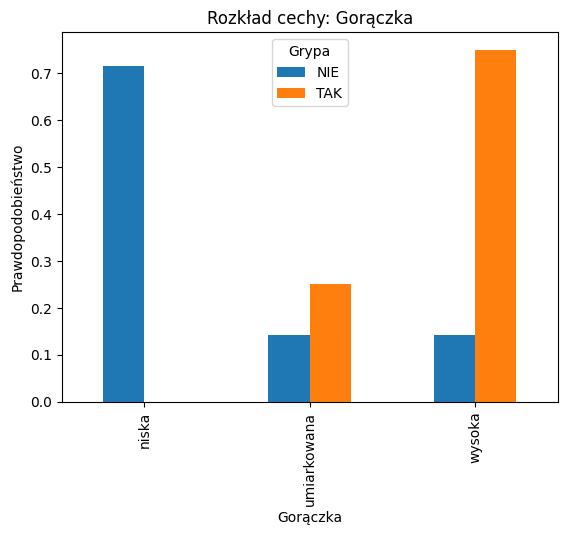

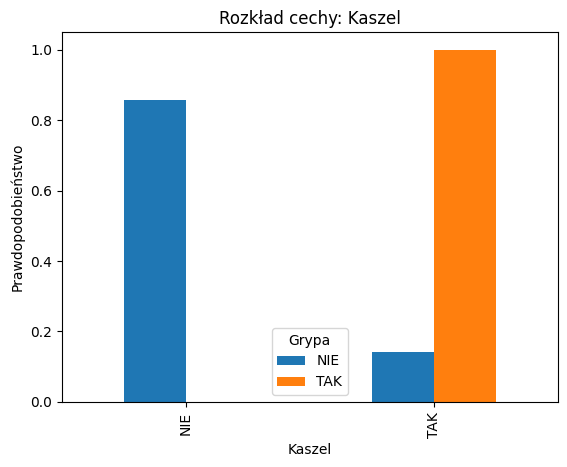

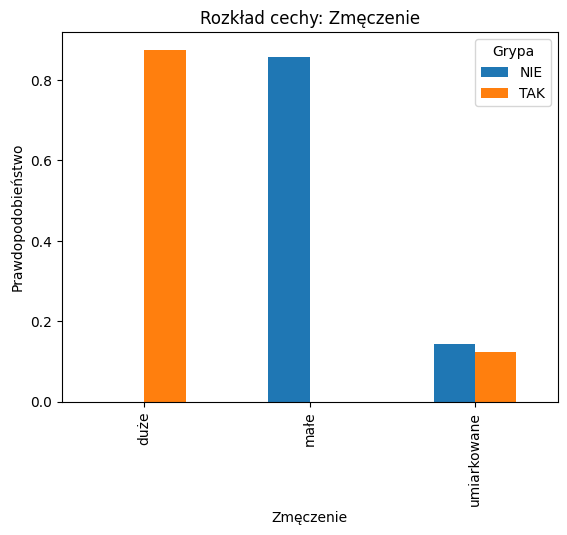

In [26]:
data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df_grypa = pd.DataFrame(data)
flu_counts = df_grypa['Grypa'].value_counts()
print("Liczba przypadków grypy:")
print(flu_counts)

def conditional_probs(feature):
    probs = {}
    for val in df_grypa[feature].unique():
        p_tak = len(df_grypa[(df_grypa['Grypa'] == 'TAK') & (df_grypa[feature] == val)]) / len(df_grypa[df_grypa['Grypa'] == 'TAK'])
        p_nie = len(df_grypa[(df_grypa['Grypa'] == 'NIE') & (df_grypa[feature] == val)]) / len(df_grypa[df_grypa['Grypa'] == 'NIE'])
        probs[val] = (p_tak, p_nie)
    return probs

features = ['Gorączka', 'Kaszel', 'Zmęczenie']
cond_results = {f: conditional_probs(f) for f in features}

print("\nPrawdopodobieństwa warunkowe P(cecha|Grypa):")
for feature, vals in cond_results.items():
    print(f"\n{feature}:")
    for val, (p_tak, p_nie) in vals.items():
        print(f"  {val}: P(TAK)={p_tak:.2f}, P(NIE)={p_nie:.2f}")

for feature in features:
    counts = pd.crosstab(df_grypa[feature], df_grypa['Grypa'], normalize='columns')
    counts.plot(kind='bar')
    plt.title(f"Rozkład cechy: {feature}")
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel(feature)
    plt.show()

In [27]:

pacjenci = [
    {'Gorączka': 'wysoka', 'Kaszel': 'TAK', 'Zmęczenie': 'duże'},        # Pacjent A
    {'Gorączka': 'niska', 'Kaszel': 'NIE', 'Zmęczenie': 'małe'},          # Pacjent B
    {'Gorączka': 'umiarkowana', 'Kaszel': 'TAK', 'Zmęczenie': 'umiarkowane'}  # Pacjent C
]

p_tak = len(df_grypa[df_grypa['Grypa'] == 'TAK']) / len(df)
p_nie = len(df_grypa[df_grypa['Grypa'] == 'NIE']) / len(df)

def predict(patient):
    score_tak = p_tak
    score_nie = p_nie

    for feature, value in patient.items():
        p_feat_tak, p_feat_nie = cond_results[feature].get(value, (0,0))
        score_tak *= p_feat_tak
        score_nie *= p_feat_nie

    total = score_tak + score_nie
    prob_tak = score_tak / total if total > 0 else 0
    prob_nie = score_nie / total if total > 0 else 0

    prediction = "TAK" if prob_tak > prob_nie else "NIE"
    return prediction, prob_tak, prob_nie

for i, pacjent in enumerate(pacjenci, start=1):
    pred, pt, pn = predict(pacjent)
    print(f"Pacjent {i}: Predykcja={pred}, P(TAK)={pt:.2f}, P(NIE)={pn:.2f}")


Pacjent 1: Predykcja=TAK, P(TAK)=1.00, P(NIE)=0.00
Pacjent 2: Predykcja=NIE, P(TAK)=0.00, P(NIE)=1.00
Pacjent 3: Predykcja=TAK, P(TAK)=0.92, P(NIE)=0.08
